# Instructions
- Some parts of the code are already done for you
- You need to execute all the cells
- You need to add the code where ever you see `"#### Add your code here ####"`
- Marks are mentioned along with the cells

# Face recognition
Task is to recognize a faces

### Dataset
**Aligned Face Dataset from Pinterest**

This dataset contains 10.770 images for 100 people. All images are taken from 'Pinterest' and      aligned using dlib library.

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow
tensorflow.__version__

'2.0.0'

#### Mount Google drive if you are using google colab
- We recommend using Google Colab as you can face memory issues and longer runtimes while running on local

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#### Change current working directory to project folder (1 mark)

In [0]:
import os
os.chdir('/content/drive/My Drive/Face Recognition')

### Extract the zip file (2 marks)
- Extract Aligned Face Dataset from Pinterest.zip

In [5]:
#### Add your code here #### 
path = '/content/drive/My Drive/Face Recognition/Aligned Face Dataset from Pinterest.zip','r'
import zipfile
data = zipfile.ZipFile('/content/drive/My Drive/Face Recognition/Aligned Face Dataset from Pinterest.zip','r')
data.extractall(path = '/content/drive/My Drive/Face Recognition')
!ls

KeyboardInterrupt: ignored

### Function to load images
- Define a function to load the images from the extracted folder and map each image with person id 


In [0]:
import numpy as np
import os

class IdentityMetadata():
    def __init__(self, base, name, file):
        # print(base, name, file)
        # dataset base directory
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file) 
    
def load_metadata(path):
    metadata = []
    for i in os.listdir(path):
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.jpg' or ext == '.jpeg':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata('PINS')

### Define function to load image
- Define a function to load image from the metadata

In [0]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

#### Load a sample image (2 marks)
- Load one image using the function "load_image"

[[[1 0 0]
  [0 0 0]
  [0 1 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 0 0]
  [0 0 0]
  [0 1 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[1 0 0]
  [0 0 0]
  [0 1 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 1 0]
  [0 0 0]
  ...
  [0 0 2]
  [0 0 2]
  [1 0 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 0 2]
  [0 0 2]
  [1 0 0]]

 [[0 1 0]
  [0 1 0]
  [0 1 0]
  ...
  [0 0 0]
  [0 0 0]
  [1 0 0]]]
(299, 299, 3)


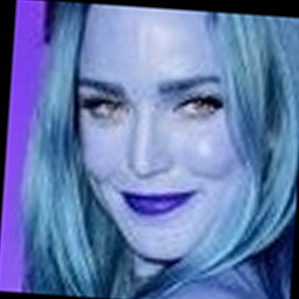

(299, 299, 3)
The number of features in any image from the data set are: 268203


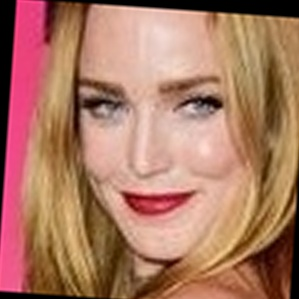

In [8]:
from google.colab.patches import cv2_imshow
#### Add your code here ####
a = load_image('/content/drive/My Drive/Face Recognition/PINS/pins_Caity Lotz/Caity Lotz10.jpg')
print(a)
print(a.shape)
cv2_imshow(a)

img = cv2.imread('/content/drive/My Drive/Face Recognition/PINS/pins_Caity Lotz/Caity Lotz10.jpg')
print((img.shape))
flattened_img = img.flatten()

print("The number of features in any image from the data set are: {0}".format(flattened_img.shape[0]))
cv2_imshow(img)

### VGG Face model
- Here we are giving you the predefined model for VGG face

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ZeroPadding2D, Convolution2D, MaxPooling2D, Dropout, Flatten, Activation

def vgg_face():	
    model = Sequential()
    model.add(ZeroPadding2D((1,1),input_shape=(224,224, 3)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Convolution2D(512, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Convolution2D(4096, (7, 7), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(4096, (1, 1), activation='relu'))
    model.add(Dropout(0.5))
    model.add(Convolution2D(2622, (1, 1)))
    model.add(Flatten())
    model.add(Activation('softmax'))
    return model

#### Load the model (2 marks)
- Load the model defined above
- Then load the given weight file named "vgg_face_weights.h5"

In [0]:
# model = #### Add your code here ####
#### Add your code here ####

model = vgg_face()
model.load_weights('/content/drive/My Drive/Face Recognition/vgg_face_weights.h5',by_name=True)

### Get vgg_face_descriptor

In [0]:
from tensorflow.keras.models import Model
vgg_face_descriptor = Model(inputs=model.layers[0].input, outputs=model.layers[-2].output)

### Generate embeddings for each image in the dataset
- Given below is an example to load the first image in the metadata and get its embedding vector from the pre-trained model. 

In [12]:
# Get embedding vector for first image in the metadata using the pre-trained model

img_path = metadata[0].image_path()
img = load_image(img_path)

# Normalising pixel values from [0-255] to [0-1]: scale RGB values to interval [0,1]
img = (img / 255.).astype(np.float32)

img = cv2.resize(img, dsize = (224,224))
print(img.shape)

# Obtain embedding vector for an image
# Get the embedding vector for the above image using vgg_face_descriptor model and print the shape 
embedding_vector = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]

print(embedding_vector.shape)

(224, 224, 3)
(2622,)


### Generate embeddings for all images (5 marks)
- Write code to iterate through metadata and create embeddings for each image using `vgg_face_descriptor.predict()` and store in a list with name `embeddings`

- If there is any error in reading any image in the dataset, fill the emebdding vector of that image with 2622-zeroes as the final embedding from the model is of length 2622.

In [13]:
embeddings = np.zeros((metadata.shape[0], 2622))

for a, b in enumerate(metadata):
    # print(i)
    try:
        img = load_image(b.image_path())
        # scale RGB values to interval [0,1]
        img = (img / 255.).astype(np.float32)
        img = cv2.resize (img, dsize = (224,224))
        # obtain embedding vector for image
        embeddings[a] = vgg_face_descriptor.predict(np.expand_dims(img, axis=0))[0]
    except:
        print(a,b)

208 PINS/pins_Amanda Crew/Amanda Crew25.jpg


### Function to calculate distance between given 2 pairs of images.

- Consider distance metric as "Squared L2 distance"
- Squared l2 distance between 2 points (x1, y1) and (x2, y2) = (x1-x2)^2 + (y1-y2)^2

In [0]:
def distance(emb1, emb2):
    return np.sum(np.square(emb1 - emb2))

#### Plot images and get distance between the pairs given below
- 2, 3 and 2, 180
- 30, 31 and 30, 100
- 70, 72 and 70, 115

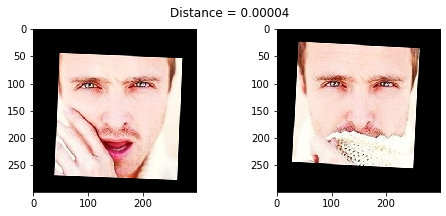

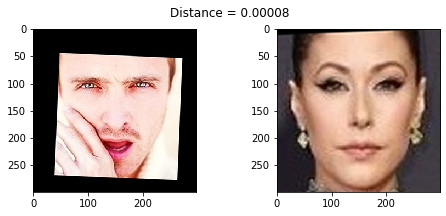

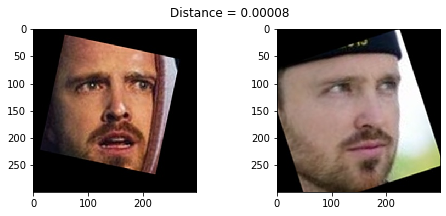

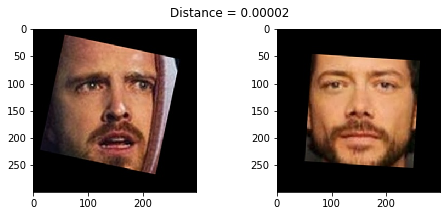

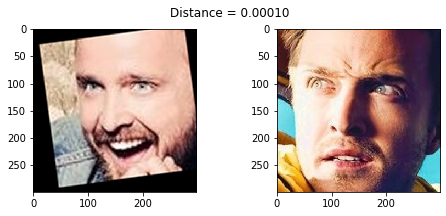

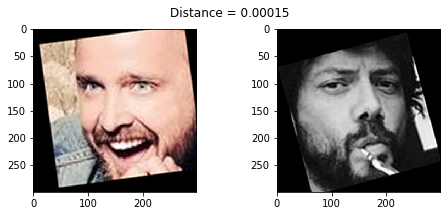

In [17]:
import matplotlib.pyplot as plt

def show_pair(idx1, idx2):
    plt.figure(figsize=(8,3))
    plt.suptitle(f'Distance = {distance(embeddings[idx1], embeddings[idx2]):.5f}')
    plt.subplot(121)
    plt.imshow(load_image(metadata[idx1].image_path()))
    plt.subplot(122)
    plt.imshow(load_image(metadata[idx2].image_path()));    

show_pair(2, 3)
show_pair(2, 180)

show_pair(30, 31)
show_pair(30, 100)

show_pair(70, 72)
show_pair(70, 115)

### Reduce dimensions using PCA (3 marks)
- Reduce feature dimensions using Principal Component Analysis

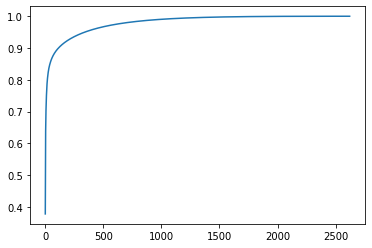

In [18]:
from sklearn.decomposition import PCA
# Plotitng the graph to see the optimal number of 
import matplotlib.pyplot as plt
pca = PCA().fit(embeddings)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [36]:
#Reduce dimensionality using PCA
# Cumsum graph suggests 1500 variables explain ~95% variability, using 1500 variable
#Hever the model accuracy remains aroud 15% which is very low
# applying 'mle'to allow model to find suitable variables

from sklearn.decomposition import PCA
pca = PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None, svd_solver='full', tol=0.0, whiten=False)
pca.fit(embeddings)
embed = pca.transform(embeddings)
a= np.array(embed)
a.shape
#### Add your code here ####

(10770, 2616)

### Create train and test sets (5 marks)
- Create X_train, X_test and y_train, y_test
- Use train_idx to seperate out training features and labels
- Use test_idx to seperate out testing features and labels

In [0]:
size=len(metadata)

In [38]:
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

#We extract unique set of labels from given pic data.
#We use the folder names to arrive at this, by extracting the individual person 
#folder name from the array

import numpy as np
testarray=metadata.astype(str)
label=[]
for idx in range(size):

  first, second, third =testarray[idx].split('/')
  pins,lbl = second.split('_')
  label.append(lbl)
labeltestarray=np.array(label)
lblarray=np.unique(labeltestarray)

labeltestarray

array(['Aaron Paul', 'Aaron Paul', 'Aaron Paul', ..., 'zendaya',
       'zendaya', 'zendaya'], dtype='<U24')

In [39]:
lblarray

array(['Aaron Paul', 'Alvaro Morte', 'Amanda Crew', 'Amaury Nolasco',
       'Anna Gunn', 'Benedict Cumberbatch', 'Betsy Brandt',
       'Brenton Thwaites', 'Brit Marling', 'Bryan Cranston', 'Caity Lotz',
       'Cameron Monaghan', 'Chance Perdomo', 'Chris Evans', 'Chris Pratt',
       'Cobie Smulders', 'Danielle Panabaker', 'Dave Franco',
       'Dominic Purcell', 'Dwayne Johnson', 'Emilia Clarke',
       'Emily Bett Rickards', 'Emma Stone', 'Gwyneth Paltrow',
       'Henry Cavil', 'Jason Momoa', 'Jeremy Renner', 'Jesse Eisenberg',
       'Jim Parsons', 'Jon Bernthal', 'Josh Radnor', 'Kit Harington',
       'Krysten Ritter', 'Kumail Nanjiani', 'Maisie Williams',
       'Mark Ruffalo', 'Martin Starr', 'Melissa benoit', 'Mike Colter',
       'Morena Baccarin', 'Morgan Freeman', 'Natalie Portman ',
       'Neil Patrick Harris', 'Paul Rudd', 'Pedro Alonso',
       'Peter Dinklage', 'RJ Mitte', 'Rami Melek', 'Robert Knepper',
       'Robin Taylor', 'Ryan Reynolds', 'Sarah Wayne Callies',
 

In [40]:

#### Add your code here ####
#Creating train & test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,labeltestarray,test_size=0.3,random_state = 1)

import pandas as pd
df_y=pd.DataFrame(y_train)
df_ytst=pd.DataFrame(y_test)
df_l=pd.DataFrame(labeltestarray)
print("train",df_y[0].value_counts())
print("test",df_ytst[0].value_counts())
print("orig",df_l[0].value_counts())
train_idx = np.arange(metadata.shape[0]) % 9 != 0
test_idx = np.arange(metadata.shape[0]) % 9 == 0

train elizabeth olsen face    126
alexandra daddario      124
emma watson face        114
amber heard face        111
Emilia Clarke           107
                       ... 
tati gabrielle           43
mark zuckerberg          37
Martin Starr             36
shakira                  33
drake                    23
Name: 0, Length: 100, dtype: int64
test kiernan shipka          62
gal gadot face          58
elizabeth olsen face    55
anne hathaway           51
Maisie Williams         50
                        ..
maria pedraza           17
RJ Mitte                15
Jon Bernthal            15
drake                   15
Martin Starr            12
Name: 0, Length: 100, dtype: int64
orig elizabeth olsen face    181
kiernan shipka          167
alexandra daddario      165
emma watson face        163
gal gadot face          158
                       ... 
mark zuckerberg          62
Jon Bernthal             61
shakira                  50
Martin Starr             48
drake                    38
N

### Encode the Labels (3 marks)
- Encode the targets
- Use LabelEncoder

In [0]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

### Standardize the feature values (3 marks)
- Scale the features using StandardScaler

In [42]:
x_trnarray=np.array(x_train)
print(x_trnarray.shape)
# Standarize features
from sklearn.preprocessing import StandardScaler

#### Add your code here ####
scalar = StandardScaler()
x_train_fit = scalar.fit_transform(x_trnarray)
x_test_fit = scalar.fit_transform(x_test)
x_train_fit.shape

(7539, 2616)


(7539, 2616)

In [43]:
np.mean(x_train_fit)
# np.save('test.npy',embeddings)

-3.8946139471114544e-19

In [44]:
embeddings

array([[-6.04517700e-04,  1.61965319e-04, -1.48287130e-04, ...,
         7.51749831e-05, -3.21806758e-04,  2.08726691e-04],
       [-4.11167479e-04,  3.42840125e-04, -4.43571480e-04, ...,
         3.31780408e-04, -3.45601904e-04,  1.08726788e-04],
       [-2.16975925e-04,  3.23412387e-04, -3.01099120e-04, ...,
         3.88181419e-04, -3.27608956e-04,  1.45887883e-04],
       ...,
       [-5.08051191e-04,  2.89230171e-04, -3.66823340e-04, ...,
         1.23919381e-04, -2.18124798e-04,  2.05527584e-04],
       [-4.52681415e-04,  2.01116301e-04, -4.47556347e-04, ...,
         3.65264495e-05,  8.58148051e-05,  1.77913189e-05],
       [-4.03164217e-04,  1.74635541e-04, -3.44709726e-04, ...,
         1.27655847e-04, -4.37465533e-05,  8.95413541e-05]])

### Build a Classifier (3 marks)
- Use SVM Classifier to predict the person in the given image
- Fit the classifier and print the score

In [45]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(7539, 2616)
(7539,)
(3231, 2616)
(3231,)


In [55]:
# Training dataset on the optimal hypermeter found in Grid Search
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
model_svc=SVC(C=0.001,kernel="linear")
model_svc.fit(x_train_fit,y_train)
score=cross_val_score(model_svc,x_test,y_test)
print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


[0.01893598 0.01949861 0.01913876]


In [49]:
#Model accuracy is too low, around 20%, which is very low 
#Applying Grid Search for finding optimum hyper parameters
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.01,0.001,0.1],'gamma':[0.001,0.01,0.1],'kernel':['linear','rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=1)
grid.fit(x_train_fit,y_train)
#Getting best parameters for SVC
grid.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 18 candidates, totalling 54 fits


[Parallel(n_jobs=1)]: Done  54 out of  54 | elapsed: 204.3min finished


{'C': 0.01, 'gamma': 0.001, 'kernel': 'linear'}

In [53]:
#Applying SVC again by tuning hyperparameter
model_svc=SVC(C=0.01,gamma= 0.001,kernel="linear")
model_svc.fit(x_train_fit,y_train)
score=cross_val_score(model_svc,x_test_fit,y_test)
print('the accuracy is: ',score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the accuracy is:  [0.09287647 0.1095636  0.09952153]


In [54]:
#The accuracy have actually gone down, trying another combination
model_svc=SVC(C=0.01,gamma= 0.001,kernel="rbf")
model_svc.fit(x_train_fit,y_train)
score=cross_val_score(model_svc,x_test_fit,y_test)
print('the accuracy is: ',score)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


the accuracy is:  [0.01893598 0.01949861 0.01913876]


### Test results (1 mark)
- Take 10th image from test set and plot the image
- Report to which person(folder name in dataset) the image belongs to

In [0]:
y_pred=model_svc.predict(x_test_fit)

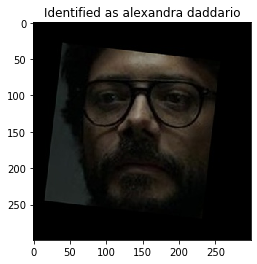

In [57]:
import warnings
# Suppress LabelEncoder warning
warnings.filterwarnings('ignore')

example_idx = 10

example_image = load_image(metadata[test_idx][example_idx].image_path())
example_prediction = y_pred
example_identity = label_encoder.inverse_transform(example_prediction)[0]

plt.imshow(example_image)
plt.title(f'Identified as {example_identity}');



In [0]:
#Even after using grid search, accuracy remains extremly low
#Accuracy can be furthere mproved by taking some additional measures